<a href="https://colab.research.google.com/gist/AnirudhJM24/39dc2894d284d3e6d9e27d49bf758f1a/hrproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("hr.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


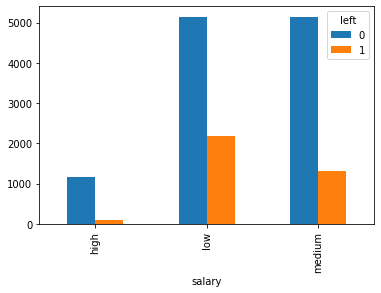

In [8]:
pd.crosstab(data.salary,data.left).plot(kind="bar")

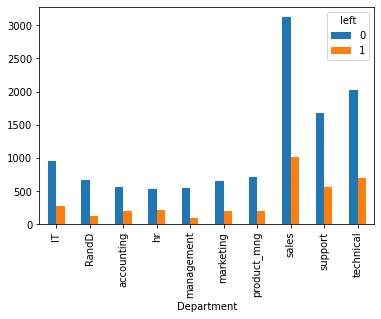

In [9]:
pd.crosstab(data.Department,data.left).plot(kind="bar")

In [10]:
subdf = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [12]:
x=pd.get_dummies(subdf.salary,prefix="salary")
data2=pd.concat([subdf,x],axis='columns')
data2

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [14]:
data2.drop("salary",axis='columns',inplace=True)
data2

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [15]:
y=data.left

In [16]:
from sklearn.model_selection import train_test_split
data2_train,data2_test,y_train,y_test = train_test_split(data2,y,test_size=0.2)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [18]:
lr.fit(data2_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
res=lr.predict(data2_test)
data2_test



,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
11515,0.93,139,0,0,0,1
12764,0.83,223,0,0,0,1
13358,0.57,250,0,0,1,0
11870,0.86,273,0,0,0,1
4988,0.50,166,0,0,1,0
...,...,...,...,...,...,...
5666,0.96,268,0,0,0,1
8016,0.80,204,0,0,1,0
3074,0.21,144,0,0,0,1
14862,0.09,269,0,0,0,1


In [37]:
res[2998]

1

In [36]:
y_test

11515    0
12764    1
13358    0
11870    0
4988     0
        ..
5666     0
8016     0
3074     0
14862    1
10640    0
Name: left, Length: 3000, dtype: int64

In [27]:
lr.score(data2_test,y_test)

0.7693333333333333

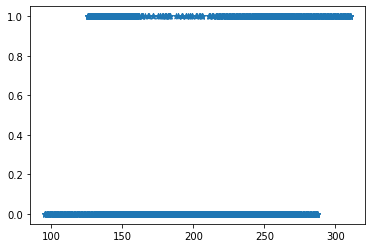

In [43]:
plt.scatter(data.average_montly_hours,data.left,marker="*")

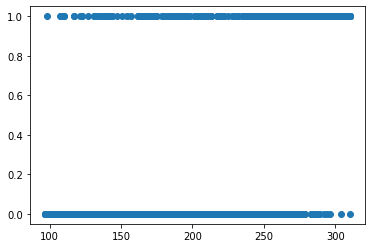

In [46]:
plt.scatter(data2_test.average_montly_hours,res)